# 2B. Monsoon (Sperber)

This notebook demonstrates how to use the PCDMI Monsoon (Sperber) driver.

It is expected that you have downloaded the sample data as demonstrated in [the download notebook](Demo_0_download_data.ipynb)

The following cell reads in the choices you made during the download data step.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

For immediate help with using the monsoon (sperber) driver, use the `--help` flag, demonstrated here:

In [2]:
%%bash
driver_monsoon_sperber.py --help

usage: driver_monsoon_sperber.py [-h] [--parameters PARAMETERS]
                                 [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                 [--mip MIP] [--exp EXP]
                                 [--results_dir RESULTS_DIR]
                                 [--reference_data_path REFERENCE_DATA_PATH]
                                 [--modpath MODPATH] [--frequency FREQUENCY]
                                 [--realm REALM]
                                 [--reference_data_name REFERENCE_DATA_NAME]
                                 [--reference_data_lf_path REFERENCE_DATA_LF_PATH]
                                 [--modpath_lf MODPATH_LF] [--varOBS VAROBS]
                                 [--varModel VARMODEL]
                                 [--ObsUnitsAdjust OBSUNITSADJUST]
                                 [--ModUnitsAdjust MODUNITSADJUST]
                                 [--units UNITS] [--osyear OSYEAR]
                                 [--msy

## Basic Example

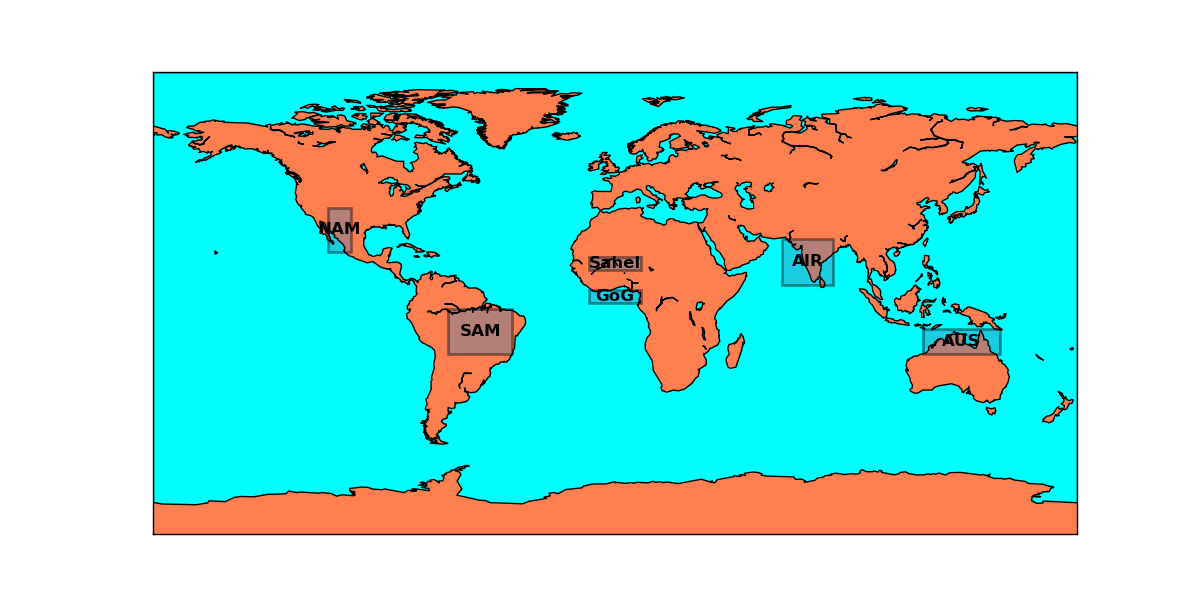

In [3]:
from IPython.display import Image

Image(filename = "../../../pcmdi_metrics/monsoon_sperber/doc/monsoon_domain_map.png")

First we demonstrate the parameter file for the basic example. 

Along with model and observational data, this metric needs to be provided with land fraction masks (`modpath_lf` and `reference_data_lf_path`). The model needs to have `mip` and `exp` specified at a minimum. `frequency`, `realm`, and `realization` are optional. Furthermore, start and end years must be selected for both model and observations.

In [4]:
with open("basic_monsoon_sperber_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# MODEL VARIABLES THAT MUST BE SET
mip = 'cmip5'
exp = 'historical'
#frequency = 'da'
#realm = 'atm'
#realization = 'r6i1p1'

# MODEL VERSIONS AND ROOT PATH
modnames = ['GISS-E2-H']
modpath = 'demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc'
modpath_lf = 'demo_data_tmp/CMIP5_demo_data/cmip5.historical.GISS-E2-H.sftlf.nc' # land fraction mask

varModel = 'pr'
ModUnitsAdjust = (True, 'multiply', 86400.0)  # kg m-2 s-1 to mm day-1
units = 'mm/d'

msyear = 2000
meyear = 2005

# ROOT PATH FOR OBSERVATIONS
reference_data_path = 'demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc'
reference_data_name = 'GPCP-IP'
reference_data_lf_path = 'demo_data_tmp/misc_demo_data/fx/sftlf.GPCP-IP.1x1.nc'  # land fraction mask

varOBS = 'pr'
ObsUnitsAdjust = (True, 'multiply', 86400.0)  # kg m-2 s

To run the driver using only a parameter file for inputs, do the following:

In [5]:
%%bash
driver_monsoon_sperber.py -p basic_monsoon_sperber_param.py

models: ['GISS-E2-H']
list_monsoon_regions: ['AIR', 'AUS', 'Sahel', 'GoG', 'NAmo', 'SAmo']
number of models: 1
realization:  r1i1p1
output dir for graphics: demo_output/monsoon_sperber/Ex1
output dir for diagnostic_results: demo_output/monsoon_sperber/Ex1
output dir for metrics_results: demo_output/monsoon_sperber/Ex1
debug:  False
====  model: obs ======================================


2025-09-09 13:16:02,553 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-09-09 13:16:02,553 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


 --- obs ---
model_path =  demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc
plot:: region: AIR, nrows: 3, ncols: 2, index: 1
plot:: region: AUS, nrows: 3, ncols: 2, index: 2
plot:: region: Sahel, nrows: 3, ncols: 2, index: 3
plot:: region: GoG, nrows: 3, ncols: 2, index: 4
plot:: region: NAmo, nrows: 3, ncols: 2, index: 5
plot:: region: SAmo, nrows: 3, ncols: 2, index: 6




 year =  1998


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  1999


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


INFO::2025-09-09 13:17::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:17:05,962 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:17:05,962 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json


====  model: GISS-E2-H ======================================
model_lf_path =  demo_data_tmp/CMIP5_demo_data/cmip5.historical.GISS-E2-H.sftlf.nc


2025-09-09 13:17:05,990 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-09-09 13:17:05,990 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


 --- r1i1p1 ---
model_path =  demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
plot:: region: AIR, nrows: 3, ncols: 2, index: 1
plot:: region: AUS, nrows: 3, ncols: 2, index: 2
plot:: region: Sahel, nrows: 3, ncols: 2, index: 3
plot:: region: GoG, nrows: 3, ncols: 2, index: 4
plot:: region: NAmo, nrows: 3, ncols: 2, index: 5
plot:: region: SAmo, nrows: 3, ncols: 2, index: 6




 year =  2000


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2001


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2002


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2003


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2004


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2005


region

INFO::2025-09-09 13:17::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:17:43,238 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:17:43,238 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output/monsoon_sperber/Ex1/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json


## Output options

There are several options for output data format. Users can choose to generate metrics in netCDF format along with png graphics.

To save these results in a different folder, the `--result_dir` value is changed. Using `$1` to refer to the `demo_output_directory` variable is a trick for the Jupyter Notebook and is not needed for regular command line use.

In [6]:
%%bash -s "$demo_output_directory"
driver_monsoon_sperber.py -p basic_monsoon_sperber_param.py \
--nc_out --plot --results_dir $1/monsoon_sperber/Ex2

models: ['GISS-E2-H']
list_monsoon_regions: ['AIR', 'AUS', 'Sahel', 'GoG', 'NAmo', 'SAmo']
number of models: 1
realization:  r1i1p1
output dir for graphics: demo_output_tmp/monsoon_sperber/Ex2
output dir for diagnostic_results: demo_output_tmp/monsoon_sperber/Ex2
output dir for metrics_results: demo_output_tmp/monsoon_sperber/Ex2
debug:  False
====  model: obs ======================================


2025-09-09 13:18:03,905 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-09-09 13:18:03,905 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


 --- obs ---
model_path =  demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc
plot:: region: AIR, nrows: 3, ncols: 2, index: 1
plot:: region: AUS, nrows: 3, ncols: 2, index: 2
plot:: region: Sahel, nrows: 3, ncols: 2, index: 3
plot:: region: GoG, nrows: 3, ncols: 2, index: 4
plot:: region: NAmo, nrows: 3, ncols: 2, index: 5
plot:: region: SAmo, nrows: 3, ncols: 2, index: 6




 year =  1998


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  1999


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


INFO::2025-09-09 13:19::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:19:12,021 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:19:12,021 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json


====  model: GISS-E2-H ======================================
model_lf_path =  demo_data_tmp/CMIP5_demo_data/cmip5.historical.GISS-E2-H.sftlf.nc


2025-09-09 13:19:12,047 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-09-09 13:19:12,047 [WARNING]: dataset.py(open_dataset:119) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


 --- r1i1p1 ---
model_path =  demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
plot:: region: AIR, nrows: 3, ncols: 2, index: 1
plot:: region: AUS, nrows: 3, ncols: 2, index: 2
plot:: region: Sahel, nrows: 3, ncols: 2, index: 3
plot:: region: GoG, nrows: 3, ncols: 2, index: 4
plot:: region: NAmo, nrows: 3, ncols: 2, index: 5
plot:: region: SAmo, nrows: 3, ncols: 2, index: 6




 year =  2000


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2001


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2002


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2003


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2004


region =  AIR
region =  AUS
region =  Sahel
region =  GoG
region =  NAmo
region =  SAmo


 year =  2005


region

INFO::2025-09-09 13:19::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:19:55,952 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
2025-09-09 13:19:55,952 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json


## Results

At a minimum, this driver will produce a JSON file containing the monsoon metrics in the `result_dir`. If the user requests the binary and plot outputs, those will also be present in the `result_dir`. Looking at the results from Ex2:

In [7]:
! ls {demo_output_directory + "/monsoon_sperber/Ex2"}

cmip5_GISS-E2-H_historical_r1i1p1_monsoon_sperber_2000-2005.nc
cmip5_GISS-E2-H_historical_r1i1p1_monsoon_sperber_2000-2005.png
cmip5_obs_historical_obs_monsoon_sperber_1998-1999.nc
cmip5_obs_historical_obs_monsoon_sperber_1998-1999.png
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005_org_36480.json
monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005_org_59111.json


The monsoon metrics are found in the "RESULTS" object in the JSON file. Below we extract and display these metrics.

In [8]:
import json
metrics_file = demo_output_directory + "/monsoon_sperber/Ex2/monsoon_sperber_stat_cmip5_historical_da_atm_2000-2005.json"
with open(metrics_file) as f:
    results = json.load(f)["RESULTS"]
print(json.dumps(results, indent = 2))

{
  "GISS-E2-H": {
    "r1i1p1": {
      "AIR": {
        "decay_index": 54,
        "duration": 20,
        "onset_index": 35,
        "slope": 0.03263245840754827
      },
      "AUS": {
        "decay_index": 54,
        "duration": 23,
        "onset_index": 32,
        "slope": 0.027284635342319282
      },
      "GoG": {
        "decay_index": 48,
        "duration": 23,
        "onset_index": 26,
        "slope": 0.01760572909468477
      },
      "NAmo": {
        "decay_index": 63,
        "duration": 51,
        "onset_index": 13,
        "slope": 0.011989028718271575
      },
      "SAmo": {
        "decay_index": 56,
        "duration": 31,
        "onset_index": 26,
        "slope": 0.020573642678822508
      },
      "Sahel": {
        "decay_index": 48,
        "duration": 18,
        "onset_index": 31,
        "slope": 0.03399930924787022
      }
    }
  }
}


For more help interpreting these values, please consult the following paper:
 
Sperber, K. and H. Annamalai, 2014:
The use of fractional accumulated precipitation for the evaluation of the
annual cycle of monsoons. Climate Dynamics, 43:3219-3244,
doi: 10.1007/s00382-014-2099-3

If `plot = True`, the driver also outputs figures that compare the precipitation pentads between model and observations.

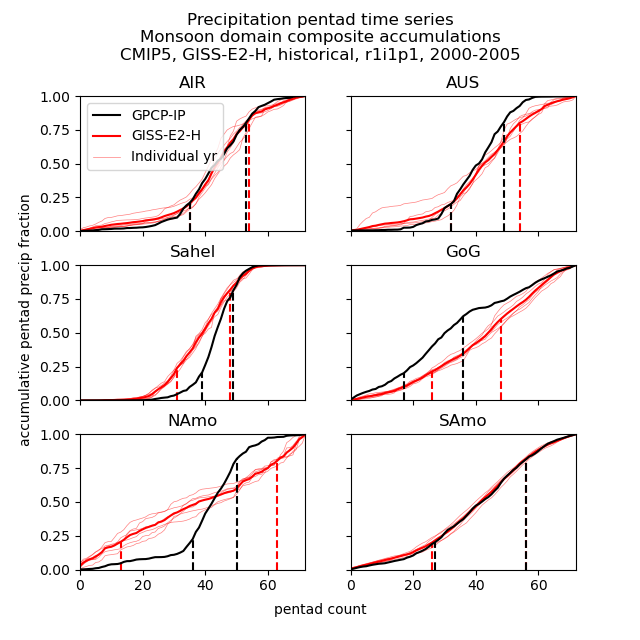

In [9]:
Image(filename=demo_output_directory+"/monsoon_sperber/Ex2/cmip5_GISS-E2-H_historical_r1i1p1_monsoon_sperber_2000-2005.png")